In [1]:
# Array manipulation
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Generate donut data

/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-15.0, 15.0, -15.0, 15.0)

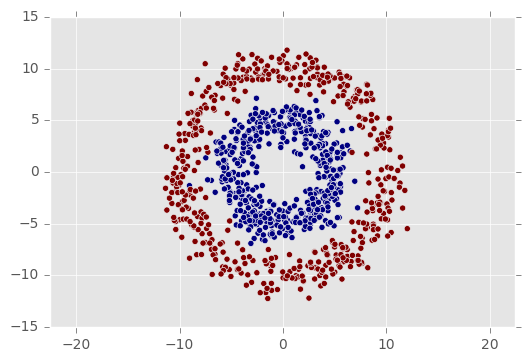

In [2]:
# Number of samples
n = 1000
# Number of features
d = 2

# Define radius of donuts
r_inner = 5
r_outter = 10

# Get points in polar cordinates
r1 = np.random.randn(n/2) + r_inner
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_inner = np.concatenate([[r1 * np.cos(theta)], [r1 * np.sin(theta)]]).T

# Get points in polar cordinates
r2 = np.random.randn(n/2) + r_outter
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_outer = np.concatenate([[r2 * np.cos(theta)], [r2 * np.sin(theta)]]).T

# Join all points
X = np.concatenate([X_inner, X_outer])
# Outer circles have 1 as target
T = np.zeros(X.shape[0])
T[500:] = 1

# Plot points
plt.scatter(X[:, 0], X[:, 1], c = T)
plt.axis('equal')

# Sigmoid neural net

In [3]:
# Hyperparameters
n_neurons = [5, 5, 2]

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
# Create the network
current_input_shape = X.shape[1]

W = []
b = []
for layer_i, neurons_i in enumerate(n_neurons):
    # Create random weights and bias for every layer
    W.append(np.random.randn(current_input_shape, neurons_i))
    b.append(np.random.randn(neurons_i))
    # Update current input shape
    current_input_shape = neurons_i

In [6]:
def feed_foward(X, W, b):
    current_input = X
    # Feed foward to the final layer
    for layer_i, W_i in enumerate(W): 
        # Multiply input with weights and add bias
        z = current_input.dot(W_i) + b[layer_i]
        # If its not the final layer apply the sigmoid function
        if (layer_i + 1) < len(W):
            z = sigmoid(z)
        # If its the final layer apply the softmax function
        else:
            pass
        
        # Update current input
        current_input = z
        
    return current_input

In [7]:
def visualize(W, b):
    x = np.arange(-15, 15.1, 0.1)
    y = np.arange(-15, 15.1, 0.1)
    xx, yy = np.meshgrid(x, y)
    pred_area = np.c_[xx.ravel(), yy.ravel()]
    
    # Calculate radius
    r = np.linalg.norm(pred_area, axis = 1)
    r = r.reshape(r.shape[0], -1)
    
    # Predict points
    pred = feed_foward(pred_area, W, b)
    #Take the most probable guess
    pred = np.max(pred, 1)
    
    pred = pred.reshape(xx.shape)

    # Plot decision boundaries
    plt.pcolormesh(xx, yy, pred, cmap = 'seismic')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c = T)

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.show()
    
    return

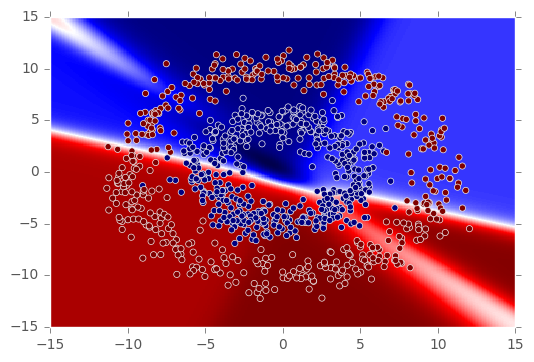

In [8]:
visualize(W, b)